## NLP project ##

**Introduction:**

This project is a Natural Language Processing (NLP) initiative that leverages data sourced from Kaggle, specifically from two CSV files named 'fake.csv' and 'true.csv'. These datasets contain information about fake news and true news articles. The primary objective of this project is to explore these datasets, develop and train a machine learning model capable of distinguishing between true and fake news. It's important to note that detecting fake news is a complex task, and while we aim for meaningful results, expectations should be realistic.

**Dataset Description:**

1. **fake.csv**: This dataset contains text data related to news articles that have been identified as fake or intentionally misleading. It may include articles that promote false information, conspiracy theories, or fabricated stories.

2. **true.csv**: In contrast, 'true.csv' contains text data for news articles that are confirmed as true and factual. These articles provide a baseline for distinguishing real news from fake news.

**Project Goals:**

- Preprocessing and Exploratory Data Analysis (EDA): Before creating a machine learning model, we will preprocess the text data, including tasks like tokenization, stemming, and removing stop words. Additionally, we will perform EDA to gain insights into the structure and characteristics of the datasets.

- Feature Engineering: We will transform the text data into numerical features using techniques like TF-IDF (Term Frequency-Inverse Document Frequency) or word embeddings to make it suitable for machine learning.

- Model Development: A machine learning model will be developed and trained on the preprocessed dataset. 

- Evaluation: The performance of the model will be evaluated using relevant metrics like accuracy, precision, recall, and F1-score. The goal is to achieve the best possible trade-off between precision and recall.

- Realistic Expectations: Detecting fake news is a challenging problem, as it often involves subtle nuances and rapidly evolving tactics. The goal is to build a model that can make informed predictions, but perfect accuracy may be elusive.


First we load the datasets and import the necessary libraries.

In [1]:
# Standard Data Handling and Analysis Libraries
import numpy as np
import pandas as pd

# Regular Expressions for Text Processing
import re

# Text Preprocessing and NLP Libraries
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Sentiment Analysis and Text Sentiment Scoring
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text Data Exploration and Analysis
from collections import Counter

# Word Embedding and Machine Learning Libraries
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Advanced Natural Language Processing (NLP) Tools
import spacy

# Disable pandas warnings
pd.options.mode.chained_assignment = None



RuntimeError: jaxlib version 0.4.20 is newer than and incompatible with jax version 0.4.19. Please update your jax and/or jaxlib packages.

In [2]:

# Load the first CSV file
Tr = "Data\True.csv"
dfT = pd.read_csv(Tr)

# Load the second CSV file
Fa = "Data\Fake.csv"
dfF = pd.read_csv(Fa)


#print("First DataFrame:")
#print(f"Shape: {dfT.shape}")
#print(dfT.head())

#print("\nSecond DataFrame:")
#print(f"Shape: {dfF.shape}")
#print(dfF.head())


## Text preprocessing ##

Text preprocessingis the set of tasks and techniques used to clean, format, and structure raw text data so that it becomes suitable for analysis and machine learning. The primary goal of text preprocessing is to prepare the text data in a way that enhances the effectiveness of NLP tasks, such as text classification, sentiment analysis, machine translation, and more. Here are the steps we are going to use in order to preprocess our text:

1. **Text Lowercasing:** Convert all text to lowercase to ensure consistency and prevent case sensitivity issues. This helps in treating "Word" and "word" as the same word.

2. **Tokenization:** Break the text into smaller units, typically words or subword units (tokens). Tokenization is essential for analyzing and processing text at the word level.

3. **Stop Word Removal:** Remove common words (stop words) like "the," "and," "in," which often do not carry significant meaning and can be safely excluded to reduce dimensionality.

4. **Special Character Removal:** Eliminate punctuation marks, special characters, and symbols that do not contribute to the semantic meaning of the text.

5. **Numerical and Date Removal:** If numbers and dates are not relevant to the analysis, they can be removed to focus on the text's linguistic content.

6. **Stemming and Lemmatization:** Reduce words to their root or base form. Stemming and lemmatization help in treating variations of words (e.g., "running" and "ran") as the same word, thereby reducing dimensionality.

7. **Removing HTML Tags and URLs:** For web-based text data, it's important to remove HTML tags, URLs, and other web-specific elements.


Lower Cassing

In [3]:
# Convert the text_df text column to lowercase
dfT["text"] = dfT["text"].str.lower()

#print("After lowering:")
#print(dfT.head().text.values)
#dfT.head()

# Convert the text_df text column to lowercase
dfF["text"] = dfF["text"].str.lower()

#print("After lowering:")
#print(dfF.head().text.values)
#dfF.head()


Removal of punctuation

In [4]:
# Function to remove punctuation and convert text to lowercase
def remove_punctuation(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    return text

# Apply the clean_text function to a DataFrame's 'text' column
def clean_and_print(df):
    df["text"] = df["text"].apply(remove_punctuation)
    print("After cleaning:")
    print(df.head().text.values)
    return df.head()

# for test
dataTest = {"text": ["Hello, World!", "ABCabc!!!!!!!..,;,,;,;."]}

dfT = pd.DataFrame(dfT)
dfF = pd.DataFrame(dfF)

# Apply the cleaning function to the DataFrames
clean_and_print(dfT)
clean_and_print(dfF)


After cleaning:
['washington reuters  the head of a conservative republican faction in the us congress who voted this month for a huge expansion of the national debt to pay for tax cuts called himself a “fiscal conservative” on sunday and urged budget restraint in 2018 in keeping with a sharp pivot under way among republicans us representative mark meadows speaking on cbs’ “face the nation” drew a hard line on federal spending which lawmakers are bracing to do battle over in january when they return from the holidays on wednesday lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues such as immigration policy even as the november congressional election campaigns approach in which republicans will seek to keep control of congress president donald trump and his republicans want a big budget increase in military spending while democrats also want proportional increases for nondefense “discretionary” spending on programs that support education 

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,on friday it was revealed that former milwauke...,News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,on christmas day donald trump announced that h...,News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,News,"December 25, 2017"


In [5]:
# Download stopwords if not already downloaded
nltk.download('stopwords')

# Function to remove punctuation, stopwords, and convert text to lowercase
def remove_punctuation_and_stopwords(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    text = " ".join([word for word in words if word not in stop_words])
    return text

# Apply the remove_punctuation_and_stopwords function to a DataFrame's 'text' column
def clean_and_print(df):
    df["text"] = df["text"].apply(remove_punctuation_and_stopwords)
    print("After cleaning:")
    print(df.head().text.values)
    return df.head()

# Create a sample DataFrame
dataTest = {"text": ["Hello, World!", "ABCabc!!!!!!!..,;,,;,;."]}

dfT = pd.DataFrame(dfT)
dfF = pd.DataFrame(dfF)

# Apply the cleaning function to the DataFrame
clean_and_print(dfT)
clean_and_print(dfF)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\melvy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


After cleaning:
['washington reuters head conservative republican faction us congress voted month huge expansion national debt pay tax cuts called “fiscal conservative” sunday urged budget restraint 2018 keeping sharp pivot way among republicans us representative mark meadows speaking cbs’ “face nation” drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy even november congressional election campaigns approach republicans seek keep control congress president donald trump republicans want big budget increase military spending democrats also want proportional increases nondefense “discretionary” spending programs support education scientific research infrastructure public health environmental protection “the trump administration already willing say ‘we’re going increase nondefense discretionary spending 7 percent’” meadows chairman small influential house freedom

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish americans happy new year lea...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,friday revealed former milwaukee sheriff david...,News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,christmas day donald trump announced would bac...,News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used annual christmas day message...,News,"December 25, 2017"


In [6]:


# Download stopwords if not already downloaded
nltk.download('stopwords')

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Function to remove punctuation, stopwords, and perform stemming
def remove_punctuation_stopwords_and_stem(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    # Perform stemming
    stemmed_words = [stemmer.stem(word) for word in words]
    text = " ".join(stemmed_words)
    return text

# Apply the remove_punctuation_stopwords_and_stem function to a DataFrame's 'text' column
def clean_and_print(df):
    df["text"] = df["text"].apply(remove_punctuation_stopwords_and_stem)
    print("After cleaning:")
    print(df.head().text.values)
    return df.head()

# Create a sample DataFrame
dataTest = {"text": ["Hello, World!", "ABCabc!!!!!!!..,;,,;,;."]}

dfT = pd.DataFrame(dfT)
dfF = pd.DataFrame(dfF)
# Apply the cleaning function to the DataFrame
clean_and_print(dfT)
clean_and_print(dfF)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\melvy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


After cleaning:
['washington reuter head conserv republican faction us congress vote month huge expans nation debt pay tax cut call “fiscal conservative” sunday urg budget restraint 2018 keep sharp pivot way among republican us repres mark meadow speak cbs’ “face nation” drew hard line feder spend lawmak brace battl januari return holiday wednesday lawmak begin tri pass feder budget fight like link issu immigr polici even novemb congression elect campaign approach republican seek keep control congress presid donald trump republican want big budget increas militari spend democrat also want proport increas nondefens “discretionary” spend program support educ scientif research infrastructur public health environment protect “the trump administr alreadi will say ‘we’r go increas nondefens discretionari spend 7 percent’” meadow chairman small influenti hous freedom caucu said program “now democrat say that’ enough need give govern pay rais 10 11 percent fiscal conserv don’t see rational eve

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish american happi new year leav...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,hous intellig committe chairman devin nune go ...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,friday reveal former milwauke sheriff david cl...,News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,christma day donald trump announc would back w...,News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,pope franci use annual christma day messag reb...,News,"December 25, 2017"


## The big Preprocessing function

We've consolidated all the preceding cell operations into a single cleaning function, simplifying the management of various preprocessing tasks.

In [7]:
# Download stopwords if not already downloaded
nltk.download('stopwords')

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Function to remove punctuation, stopwords, and perform stemming
def preprocess_text(text, remove_punctuation=True, remove_stopwords=True, perform_stemming=True):
    # Remove punctuation from the text (if enabled)
    if remove_punctuation:
        text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert the text to lowercase
    text = text.lower()
    
    # Remove stopwords from the text (if enabled)
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        words = text.split()
        words = [word for word in words if word not in stop_words]
        text = " ".join(words)
    
    # Perform stemming on the text (if enabled)
    if perform_stemming:
        words = text.split()
        stemmed_words = [stemmer.stem(word) for word in words]
        text = " ".join(stemmed_words)
    
    return text

# Apply the preprocess_text function to a DataFrame's 'text' column
def clean_and_print(df, remove_punctuation=True, remove_stopwords=True, perform_stemming=True):
    df["text"] = df["text"].apply(lambda text: preprocess_text(text, remove_punctuation, remove_stopwords, perform_stemming))
    print("After preprocessing:")
    print(df.head().text.values)
    return df.head()

# Load the first CSV file containing true news data
Tr = "Data\True.csv"
dfT = pd.read_csv(Tr)

# Load the second CSV file containing fake news data
Fa = "Data\Fake.csv"
dfF = pd.read_csv(Fa)

# Preprocess text in the DataFrames, removing punctuation, stopwords, and performing stemming
clean_and_print(dfT, remove_punctuation=True, remove_stopwords=True, perform_stemming=True)
clean_and_print(dfF, remove_punctuation=True, remove_stopwords=True, perform_stemming=True)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\melvy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


After preprocessing:
['washington reuter head conserv republican faction us congress vote month huge expans nation debt pay tax cut call “fiscal conservative” sunday urg budget restraint 2018 keep sharp pivot way among republican us repres mark meadow speak cbs’ “face nation” drew hard line feder spend lawmak brace battl januari return holiday wednesday lawmak begin tri pass feder budget fight like link issu immigr polici even novemb congression elect campaign approach republican seek keep control congress presid donald trump republican want big budget increas militari spend democrat also want proport increas nondefens “discretionary” spend program support educ scientif research infrastructur public health environment protect “the trump administr alreadi will say ‘we’r go increas nondefens discretionari spend 7 percent’” meadow chairman small influenti hous freedom caucu said program “now democrat say that’ enough need give govern pay rais 10 11 percent fiscal conserv don’t see rationa

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish american happi new year leav...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,hous intellig committe chairman devin nune go ...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,friday reveal former milwauke sheriff david cl...,News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,christma day donald trump announc would back w...,News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,pope franci use annual christma day messag reb...,News,"December 25, 2017"


## text analysis Frequent Words

the most used words in a visualisation

analyzing the most used words in fake news and true news from an NLP perspective is a critical step in understanding the linguistic characteristics, content, and potential manipulation techniques used in both types of news. This analysis can inform the development of NLP models and strategies for more effective fake news detection, as well as shed light on the nature of information in the media landscape.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\melvy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


the most comment words in true news are :
trump: 73422
said: 31008
people: 25941
president: 25495
would: 23420
one: 22865
us: 22005
clinton: 17957
obama: 17760
like: 17596
donald: 17101
also: 15221
new: 14135
news: 14099
even: 13658
hillary: 13510
white: 12767
time: 12689
state: 12494
via: 11164
the most comment words in fake news are :
trump: 73422
said: 31008
people: 25941
president: 25495
would: 23420
one: 22865
us: 22005
clinton: 17957
obama: 17760
like: 17596
donald: 17101
also: 15221
new: 14135
news: 14099
even: 13658
hillary: 13510
white: 12767
time: 12689
state: 12494
via: 11164


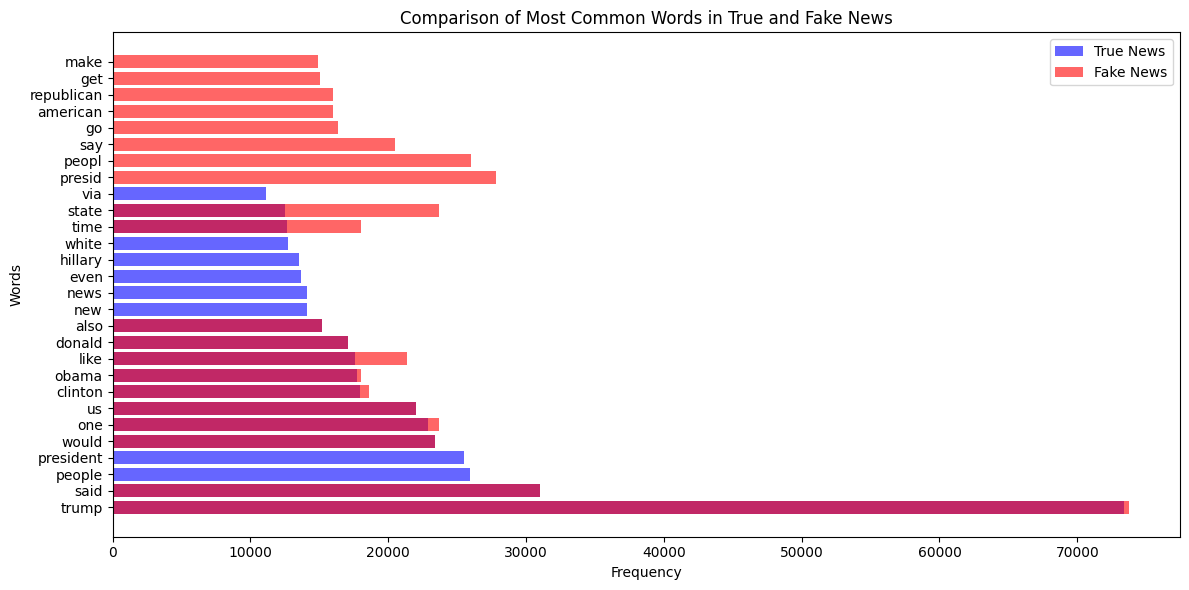

<Figure size 640x480 with 0 Axes>

In [37]:

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Function to tokenize and preprocess text
def preprocess_text(text):
    # Remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return words

Tr = "Data\True.csv"
dfT = pd.read_csv(Tr)
Tf = "Data\Fake.csv"
dfT = pd.read_csv(Tf)

# Combine all text into a single string
combined_text = " ".join(dfT["text"].astype(str))

# Tokenize and preprocess the text
wordsT = preprocess_text(combined_text)

# Count word frequencies
word_countT = Counter(wordsT)

# Get the 20 most common words
most_common_wordsT = word_countT.most_common(20)

# Print the 20 most common words
print("the most comment words in true news are :")
for word, count in most_common_wordsT:
    print(f'{word}: {count}')
    
    
# Combine all text into a single string
combined_text = " ".join(dfF["text"].astype(str))

# Tokenize and preprocess the text
wordsF = preprocess_text(combined_text)

# Count word frequencies
word_countF = Counter(wordsF)

# Get the 20 most common words
most_common_wordsF = word_countF.most_common(20)

# Print the 20 most common words
print("the most comment words in fake news are :")
for word, count in most_common_wordsT:
    print(f'{word}: {count}')


# Extract words and counts for plotting
wordsT, countsT = zip(*most_common_wordsT)
wordsF, countsF = zip(*most_common_wordsF)

# Create bar charts to compare the most common words
plt.figure(figsize=(12, 6))
plt.barh(wordsT, countsT, color='blue', label='True News', alpha=0.6)
plt.barh(wordsF, countsF, color='red', label='Fake News', alpha=0.6)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Comparison of Most Common Words in True and Fake News')
plt.legend()
plt.tight_layout()
plt.show()
# Save the plot as a PNG image
plt.savefig('Comparison_of_Most_Common_Words_in_True_and_Fake_News.png', format='png')

I was not expecting this much Similarities in beetween the 20 most used words in true news and fake news. 

## text analysis Sentiment analysis 

the main point of sentiment analysis is to extract and analyze sentiment and emotions expressed in text data. This analysis has numerous applications, including understanding public opinion, improving products and services, managing reputation, and making data-driven decisions in various domains, from business and politics to social media and content personalization.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\melvy\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


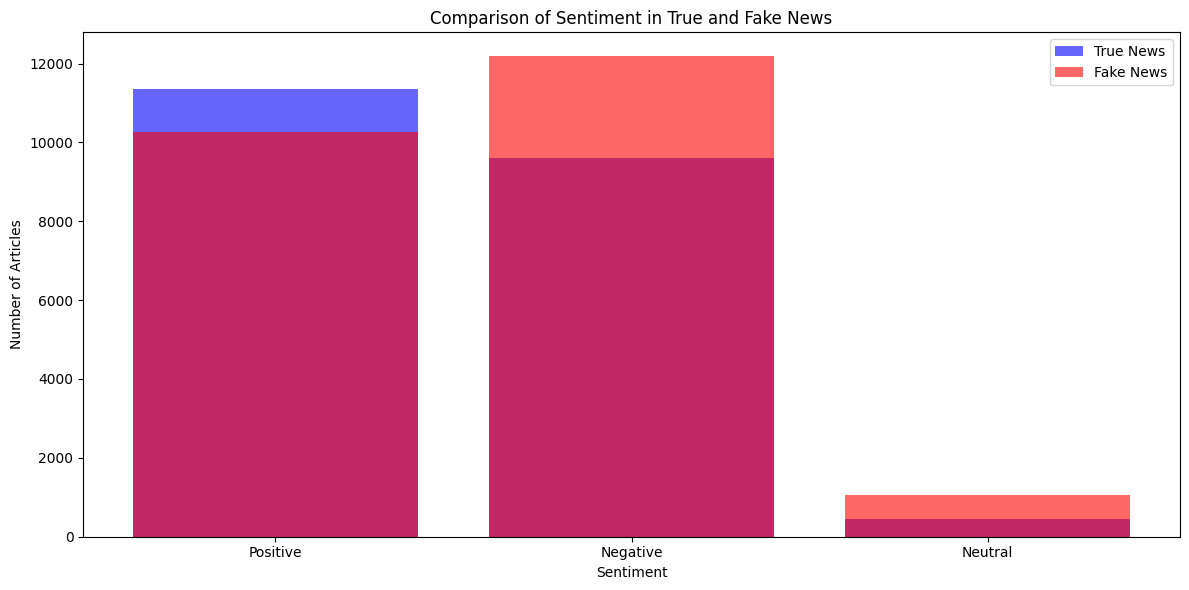

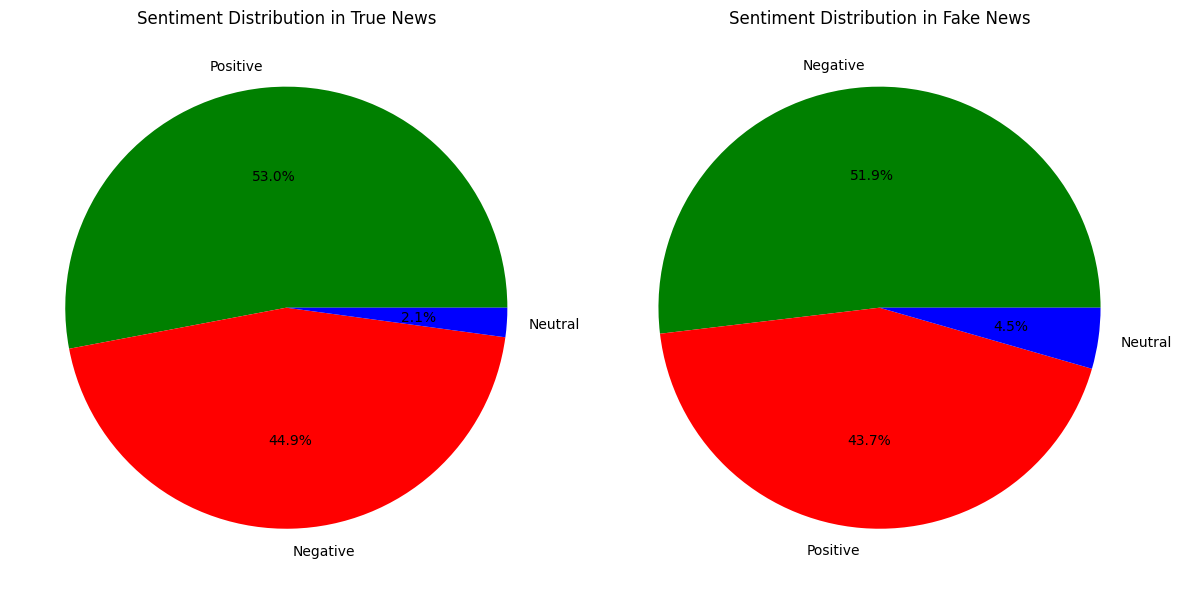

<Figure size 640x480 with 0 Axes>

In [38]:
# Download VADER lexicon
nltk.download('vader_lexicon')

# Create a SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

Tr = "Data/True.csv"
dfT = pd.read_csv(Tr)
Tf = "Data/Fake.csv"
dfF = pd.read_csv(Tf)

# Function to classify sentiment
def classify_sentiment(text):
    sentiment_scores = analyzer.polarity_scores(text)
    if sentiment_scores['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Classify the sentiment for each news article
dfT['Sentiment'] = dfT['text'].apply(classify_sentiment)
dfF['Sentiment'] = dfF['text'].apply(classify_sentiment)

# Count the number of articles in each sentiment category
true_sentiment_counts = dfT['Sentiment'].value_counts()
fake_sentiment_counts = dfF['Sentiment'].value_counts()

# Create bar charts to compare the sentiment distribution
plt.figure(figsize=(12, 6))
plt.bar(true_sentiment_counts.index, true_sentiment_counts.values, color='blue', label='True News', alpha=0.6)
plt.bar(fake_sentiment_counts.index, fake_sentiment_counts.values, color='red', label='Fake News', alpha=0.6)
plt.xlabel('Sentiment')
plt.ylabel('Number of Articles')
plt.title('Comparison of Sentiment in True and Fake News')
plt.legend()
plt.tight_layout()
#plt.show()
plt.savefig('Sentiment_Distribution_in_True_News_bar.png', format='png')
# Create pie charts to visualize the sentiment distribution
plt.figure(figsize=(12, 6))

plt.subplot(121)  # Left subplot for True News
plt.pie(true_sentiment_counts, labels=true_sentiment_counts.index, autopct='%1.1f%%', colors=['green', 'red', 'blue'])
plt.title('Sentiment Distribution in True News')


plt.subplot(122)  # Right subplot for Fake News
plt.pie(fake_sentiment_counts, labels=fake_sentiment_counts.index, autopct='%1.1f%%', colors=['green', 'red', 'blue'])

plt.title('Sentiment Distribution in Fake News')

plt.tight_layout()
plt.show()
plt.savefig('Sentiment_Distribution_in_True_News_Pie.png', format='png')

We can see that the fake news tends to be a little bit more neutral than true news wich was not something that i was expecting

## Save the cleaned files

We are doing one last preprocessing and now saving the preprocessed files (Clean_Fake.csv and Clean_True.csv)  for easy access in the future, which helps us avoid unnecessary CPU time spent on preprocessing.

In [10]:
# Download stopwords if not already downloaded
nltk.download('stopwords')

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Function to remove punctuation, stopwords, and perform stemming
def preprocess_text(text, remove_punctuation=True, remove_stopwords=True, perform_stemming=True):
    if remove_punctuation:
        text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        words = text.split()
        words = [word for word in words if word not in stop_words]
        text = " ".join(words)
    
    if perform_stemming:
        words = text.split()
        stemmed_words = [stemmer.stem(word) for word in words]
        text = " ".join(stemmed_words)
    
    return text

# Apply the preprocess_text function to a DataFrame's 'text' column
def preprocess_dataframe(df, remove_punctuation=True, remove_stopwords=True, perform_stemming=True):
    df_copy = df.copy()
    df_copy["text"] = df_copy["text"].apply(lambda text: preprocess_text(text, remove_punctuation, remove_stopwords, perform_stemming))
    return df_copy

# Load the first CSV file
Tr = "Data\True.csv"
dfT = pd.read_csv(Tr)

# Load the second CSV file
Fa = "Data\Fake.csv"
dfF = pd.read_csv(Fa)

# Preprocess text in the DataFrames and create clean datasets
Clean_True = preprocess_dataframe(dfT, remove_punctuation=True, remove_stopwords=True, perform_stemming=True)
Clean_Fake = preprocess_dataframe(dfF, remove_punctuation=True, remove_stopwords=True, perform_stemming=True)

# Save the clean datasets to CSV files if needed
Clean_True.to_csv("Data\Clean_True.csv", index=False)
Clean_Fake.to_csv("Data\Clean_Fake.csv", index=False)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\melvy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## machine learning with tensor flow

In [11]:
import tensorflow as tf
print(tf.__version__)

# Additional Libraries for a Text Classification Example
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


AttributeError: partially initialized module 'jax' has no attribute 'version' (most likely due to a circular import)

In [12]:
import pandas as pd
from gensim.models import Word2Vec

# Load the first CSV file containing true news data
Tr = "Data/Clean_True.csv"
dfT = pd.read_csv(Tr)

# Load the second CSV file containing fake news data
Fa = "Data/Clean_Fake.csv"
dfF = pd.read_csv(Fa)

# Tokenize the preprocessed text
sentencesT = [text.split() if isinstance(text, str) else [] for text in dfT["text"]]
sentencesF = [text.split() if isinstance(text, str) else [] for text in dfF["text"]]

# Train Word2Vec models on the tokenized sentences for true and fake news
modelT = Word2Vec(sentencesT, vector_size=100, window=5, min_count=1, sg=0)  # Training a Word2Vec model for true news
modelF = Word2Vec(sentencesF, vector_size=100, window=5, min_count=1, sg=0)  # Training a Word2Vec model for fake news



In [13]:

# Combine the true and fake dataframes
df = pd.concat([dfT, dfF], ignore_index=True)

# Create labels for true and fake news (0 for true, 1 for fake)
df['label'] = 0  # Label true news as 0
df.loc[df.index >= len(dfT), 'label'] = 1  # Label fake news as 1

# Split the dataset into features (X) and labels (y)
X = df['text']
y = df['label']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Replace missing values (NaN) with empty strings
X_train.fillna('', inplace=True)
X_test.fillna('', inplace=True)

# Create a TF-IDF vectorizer to convert text data to numerical features
tfidf_vectorizer = TfidfVectorizer()

# Convert the training text data into a TF-IDF representation
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Convert the test text data into the same TF-IDF representation
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Build a Logistic Regression model
logistic_regression_model = LogisticRegression()

# Train the Logistic Regression model on the TF-IDF transformed training data
logistic_regression_model.fit(X_train_tfidf, y_train)

# Predict labels for the test set using the trained model
y_pred = logistic_regression_model.predict(X_test_tfidf)

# Evaluate the model's performance by comparing predicted labels with actual labels
# Calculate accuracy, generate a confusion matrix, and create a classification report
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results to the console
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)



Accuracy: 98.93%
Confusion Matrix:
[[4302   28]
 [  68 4582]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4330
           1       0.99      0.99      0.99      4650

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [15]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from gensim.models import Word2Vec
import multiprocessing

# Combine the true and fake dataframes
df = pd.concat([dfT, dfF], ignore_index=True)

# Tokenize the preprocessed text, handling missing values
sentences = [text.split() if isinstance(text, str) else [] for text in df["text"]]

# Train a Word2Vec model
cores = multiprocessing.cpu_count()  # Number of CPU cores to use
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0, workers=cores)

# Save the Word2Vec model
word2vec_model.save("word2vec.model")



## text classification with TensorFlow/Keras

This code does the following:

Loads clean true and fake news data from CSV files.

Combines the data into a single DataFrame, assigns labels (0 for true, 1 for fake), and splits it into features (X) and labels (y).

Tokenizes the text data using a Tokenizer and converts it into numerical sequences.

Pads the sequences to have the same length for compatibility with the model.

Loads a pre-trained Word2Vec model and creates an embedding matrix for word representations.

Builds a deep learning model for text classification using TensorFlow/Keras.

Compiles and trains the model on the training data.

Evaluates the model's accuracy on the test data.

Makes predictions and calculates accuracy, precision, recall, and F1 score to assess the model's performance.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

In [17]:

# Load the first CSV file containing clean true news data
Tr = "Data/Clean_True.csv"
dfT = pd.read_csv(Tr)

# Load the second CSV file containing clean fake news data
Fa = "Data/Clean_Fake.csv"
dfF = pd.read_csv(Fa)

# Combine the true and fake dataframes into one
df = pd.concat([dfT, dfF], ignore_index=True)

# Create labels for true and fake news (0 for true, 1 for fake)
df['label'] = 0  # Label true news as 0
df.loc[df.index >= len(dfT), 'label'] = 1  # Label fake news as 1

# Split the dataset into features (X) and labels (y)
X = df['text']
y = df['label']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text data using a Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Convert text data into sequences of numerical values
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad sequences to have the same length
max_sequence_length = max([len(seq) for seq in X_train_sequences])
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post')

# Load a pre-trained Word2Vec model
word2vec_model = Word2Vec.load("word2vec.model")

# Create an embedding matrix using the Word2Vec model
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, word2vec_model.vector_size))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Build a deep learning model for text classification
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=word2vec_model.vector_size, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs=5, batch_size=32)

# Evaluate the model's performance
accuracy = model.evaluate(X_test_padded, y_test)[1]
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Make predictions using the trained model
y_pred = model.predict(X_test_padded)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert to binary predictions (0 or 1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate precision
precision = precision_score(y_test, y_pred_binary)
print("Precision: {:.2f}".format(precision))

# Calculate recall
recall = recall_score(y_test, y_pred_binary)
print("Recall: {:.2f}".format(recall))

# Calculate F1 score
f1 = f1_score(y_test, y_pred_binary)
print("F1 Score: {:.2f}".format(f1))


NameError: name 'Tokenizer' is not defined

In [18]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from gensim.models import Word2Vec
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Function to remove punctuation, stopwords, and perform stemming
def preprocess_text(text, remove_punctuation=True, remove_stopwords=True, perform_stemming=True):
    if remove_punctuation:
        text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        words = text.split()
        words = [word for word in words if word not in stop_words]
        text = " ".join(words)
    
    if perform_stemming:
        words = text.split()
        stemmed_words = [stemmer.stem(word) for word in words]
        text = " ".join(stemmed_words)
    
    return text

# Load the first CSV file
Tr = "Data/True.csv"
dfT = pd.read_csv(Tr)

# Load the second CSV file
Fa = "Data/Fake.csv"
dfF = pd.read_csv(Fa)

# Preprocess text in the DataFrames
dfT["text"] = dfT["text"].apply(preprocess_text)
dfF["text"] = dfF["text"].apply(preprocess_text)

# Combine the true and fake dataframes
df = pd.concat([dfT, dfF], ignore_index=True)

# Create labels for true and fake news (0 for true, 1 for fake)
df['label'] = 0  # Label true news as 0
df.loc[df.index >= len(dfT), 'label'] = 1  # Label fake news as 1

# Split the dataset into features (X) and labels (y)
X = df['text']
y = df['label']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Padding sequences to have the same length
max_sequence_length = max([len(seq) for seq in X_train_sequences])
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post')

# Load the Word2Vec model (assuming you have already trained it)
word2vec_model = Word2Vec.load("word2vec.model")

# Create an embedding matrix using the Word2Vec model
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, word2vec_model.vector_size))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Build a deep learning model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=word2vec_model.vector_size, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs=5, batch_size=32)

# Make predictions
y_pred = model.predict(X_test_padded)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert to binary predictions (0 or 1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate precision
precision = precision_score(y_test, y_pred_binary)
print("Precision: {:.2f}".format(precision))

# Calculate recall
recall = recall_score(y_test, y_pred_binary)
print("Recall: {:.2f}".format(recall))

# Calculate F1 score
f1 = f1_score(y_test, y_pred_binary)
print("F1 Score: {:.2f}".format(f1))


AttributeError: partially initialized module 'jax' has no attribute 'version' (most likely due to a circular import)

My results a high level of model performance (too high), and i need to be suspicious of such exceptionally high accuracy, precision, recall, and F1 score.

1. **Accuracy: 98.93%:** Accuracy is a measure of overall correct predictions. While a high accuracy is desirable, it can be misleading in imbalanced datasets or when a model simply memorizes the training data. 

2. **Precision: 0.98:** Precision is a measure of the model's ability to correctly classify positive instances. A precision of 0.98 means that 98% of the instances predicted as positive are indeed positive. 

3. **Recall: 1.00:** Recall is a measure of the model's ability to capture all positive instances. A recall of 1.00 means that the model is capturing all positive instances.

4. **F1 Score: 0.99:** The F1 score is the harmonic mean of precision and recall, which balances both metrics. A score of 0.99 indicates that the model is performing well in finding positive instances while maintaining high precision.

While these numbers might suggest that the model is performing exceptionally well, there must be a potential overfitting or other issues:

1. **Data Imbalance:** If the dataset is imbalanced, the model may perform well on the majority class but fail on the minority class. It's not the case for us

2. **Overfitting:** Extremely high performance metrics can be a sign of overfitting, where the model has learned the training data too well, including noise or outliers, and is not generalizing to new, unseen data.

3. **Data Leakage:** Sometimes, data leakage, where information from the test set inadvertently enters the training set, can result in unrealistically high performance on the test data.

4. **Validation Set:** Ensure that these metrics are calculated on a separate validation set, not the training set, to get a realistic assessment of model performance.



## confusion Matrix

By analyzing the confusion matrix, we can make informed decisions about model adjustments, feature engineering, or data preprocessing to improve the NLP model's performance for our specific task.

In [19]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["True", "Fake"], yticklabels=["True", "Fake"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Save the plot as a PNG image
plt.savefig('Confusion Matrix.png', format='png')


NameError: name 'y_pred_binary' is not defined

# ROC curve

ploting the ROC curve to visualize the trade-off between the true positive rate (sensitivity) and the false positive rate. This curve can help us understand how well our model discriminates between classes.


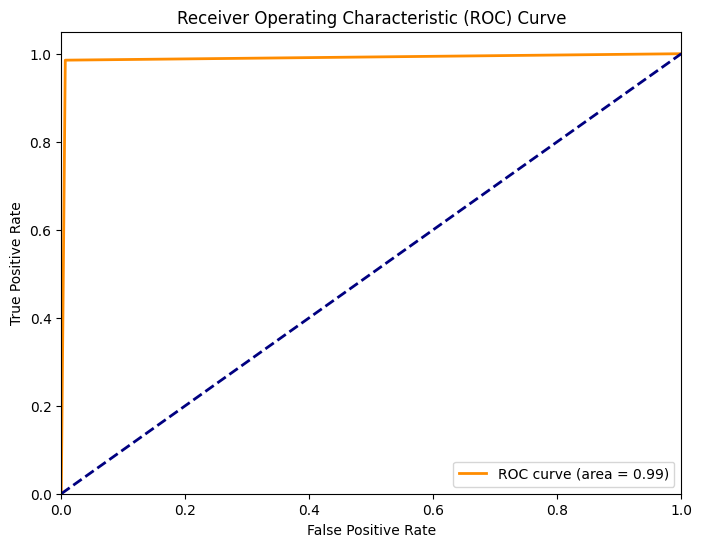

In [36]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')


# Save the plot as a PNG image
plt.savefig('roc_curve.png', format='png')

plt.show()


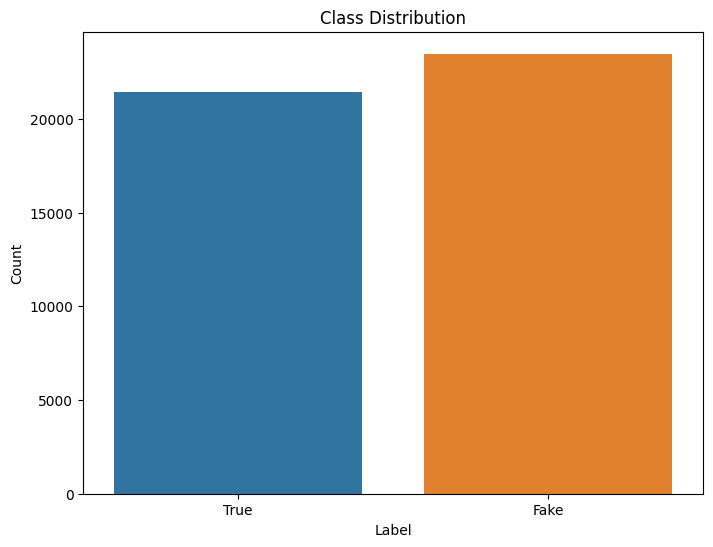

In [35]:
# we can visualize the distribution of the true and predicted labels to see how balanced or imbalanced the dataset is.
from sklearn.metrics import precision_recall_curve

# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x="label", data=df)
plt.xticks([0, 1], ["True", "Fake"])
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Class Distribution")

# Save the plot as a PNG image
plt.savefig('Class Distribution', format='png')

plt.show()


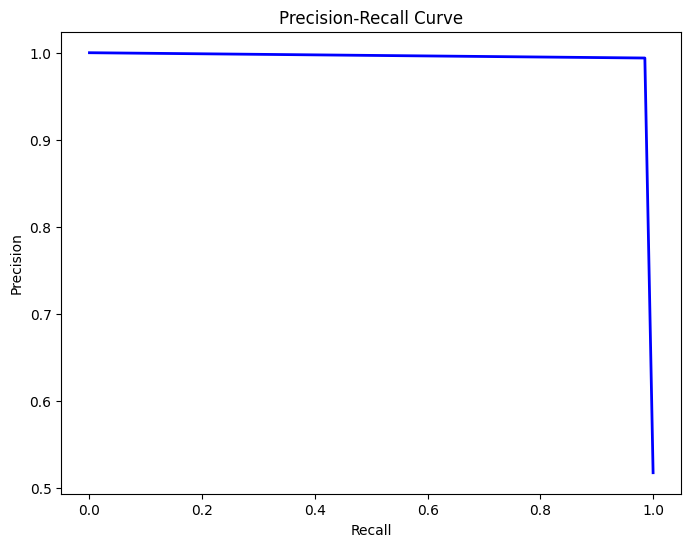

In [22]:
# This curve shows the trade-off between precision and recall for different thresholds. It's particularly useful when dealing with imbalanced datasets.
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


## Model with Pytorch

Preprocesses text data by removing punctuation, stopwords, and performing stemming.

Loads and combines two CSV files containing true and fake news data.

Tokenizes and pads the text sequences.

Loads a pre-trained Word2Vec model to create an embedding matrix.

Defines a PyTorch model for text classification using the embedding matrix.

Defines a binary cross-entropy loss and an Adam optimizer.

Converts the data to PyTorch tensors.

Trains the model for five epochs.

Evaluates the model's accuracy on the test data and prints the result.

In [34]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from gensim.models import Word2Vec
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import torch
import torch.nn as nn
import torch.optim as optim


# Download stopwords if not already downloaded
nltk.download('stopwords')


# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Function to remove punctuation, stopwords, and perform stemming
def preprocess_text(text, remove_punctuation=True, remove_stopwords=True, perform_stemming=True):
    if remove_punctuation:
        text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        words = text.split()
        words = [word for word in words if word not in stop_words]
        text = " ".join(words)
    
    if perform_stemming:
        words = text.split()
        stemmed_words = [stemmer.stem(word) for word in words]
        text = " ".join(stemmed_words)
    
    return text

# Load the first CSV file
Tr = "Data/True.csv"
dfT = pd.read_csv(Tr)

# Load the second CSV file
Fa = "Data/Fake.csv"
dfF = pd.read_csv(Fa)

# Preprocess text in the DataFrames
dfT["text"] = dfT["text"].apply(preprocess_text)
dfF["text"] = dfF["text"].apply(preprocess_text)

# Combine the true and fake dataframes
df = pd.concat([dfT, dfF], ignore_index=True)

# Create labels for true and fake news (0 for true, 1 for fake)
df['label'] = 0  # Label true news as 0
df.loc[df.index >= len(dfT), 'label'] = 1  # Label fake news as 1

# Split the dataset into features (X) and labels (y)
X = df['text']
y = df['label']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Padding sequences to have the same length
max_sequence_length = max([len(seq) for seq in X_train_sequences])
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post')

# Load the Word2Vec model (assuming you have already trained it)
word2vec_model = Word2Vec.load("word2vec.model")

# Create an embedding matrix using the Word2Vec model
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, word2vec_model.vector_size))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Define a PyTorch model
class NLPModel(nn.Module):
    def __init__(self, embedding_matrix, sequence_length):
        super(NLPModel, self).__init()
        self.embedding = nn.Embedding.from_pretrained(torch.tensor(embedding_matrix, dtype=torch.float32))
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(sequence_length * word2vec_model.vector_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.embedding(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# Create the model
model = NLPModel(embedding_matrix, max_sequence_length)

# Define loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Convert data to PyTorch tensors
X_train_tensor = torch.LongTensor(X_train_padded)
X_test_tensor = torch.LongTensor(X_test_padded)
y_train_tensor = torch.FloatTensor(y_train.values)
y_test_tensor = torch.FloatTensor(y_test.values)

# Training the model
for epoch in range(5):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor.view(-1, 1))
    loss.backward()
    optimizer.step()

# Model evaluation
with torch.no_grad():
    outputs = model(X_test_tensor)
    predictions = (outputs > 0.5).float()
    accuracy = (predictions == y_test_tensor.view(-1, 1)).float().mean()

print("Accuracy: {:.2f}%".format(accuracy.item() * 100))


AttributeError: partially initialized module 'jax' has no attribute 'version' (most likely due to a circular import)

## Model with jaxx

Preprocess the text data, including removing punctuation, stopwords, and stemming.
Combine and label the true and fake news datasets.
Tokenize and pad the text sequences.
Create a Flax-based NLP model using linen.
Define a binary cross-entropy loss function and an Adam optimizer.
Convert data into JAX arrays.
Train the model for a specified number of epochs.
Evaluate the model's accuracy on the test data.
JAX enables automatic differentiation for efficient gradient computation and allows for GPU/TPU acceleration.

this code runs faster that the previous one on my computer 

In [29]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from gensim.models import Word2Vec
import numpy as np
from sklearn.model_selection import train_test_split
import jax
import jax.numpy as jnp
from flax import linen as nn
from optax import adam

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Function to remove punctuation, stopwords, and perform stemming
def preprocess_text(text, remove_punctuation=True, remove_stopwords=True, perform_stemming=True):
    if remove_punctuation:
        text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        words = text.split()
        words = [word for word in words if word not in stop_words]
        text = " ".join(words)
    
    if perform_stemming:
        words = text.split()
        stemmed_words = [stemmer.stem(word) for word in words]
        text = " ".join(stemmed_words)
    
    return text

# Load the first CSV file
Tr = "Data/True.csv"
dfT = pd.read_csv(Tr)

# Load the second CSV file
Fa = "Data/Fake.csv"
dfF = pd.read_csv(Fa)

# Preprocess text in the DataFrames
dfT["text"] = dfT["text"].apply(preprocess_text)
dfF["text"] = dfF["text"].apply(preprocess_text)

# Combine the true and fake dataframes
df = pd.concat([dfT, dfF], ignore_index=True)

# Create labels for true and fake news (0 for true, 1 for fake)
df['label'] = 0  # Label true news as 0
df.loc[df.index >= len(dfT), 'label'] = 1  # Label fake news as 1

# Split the dataset into features (X) and labels (y)
X = df['text']
y = df['label']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Padding sequences to have the same length
max_sequence_length = max([len(seq) for seq in X_train_sequences])
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post')

# Load the Word2Vec model (assuming you have already trained it)
word2vec_model = Word2Vec.load("word2vec.model")

# Create an embedding matrix using the Word2Vec model
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, word2vec_model.vector_size))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Define a JAX-based model using Flax

class NLPModel(nn.Module):
    max_sequence_length: int
    embedding_matrix: jnp.ndarray

    def setup(self):
        self.embedding = nn.Embed(num_embeddings=self.embedding_matrix.shape[0], features=self.embedding_matrix.shape[1], kernel_init=nn.initializers.constant(self.embedding_matrix))
        self.flatten = nn.Flatten()
        self.fc1 = nn.Dense(features=64, kernel_init=nn.initializers.xavier_uniform())
        self.relu = nn.relu
        self.fc2 = nn.Dense(features=1, kernel_init=nn.initializers.xavier_uniform())

    def __call__(self, x):
        x = self.embedding(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return jax.nn.sigmoid(x)

# Create the model
model = NLPModel(max_sequence_length=max_sequence_length, embedding_matrix=jnp.array(embedding_matrix, dtype=jnp.float32))

# Define loss function and optimizer

def bce_loss(params, batch):
    inputs, targets = batch
    logits = model.apply(params, inputs)
    loss = jnp.mean(jax.nn.binary_cross_entropy_with_logits(logits, targets))
    return loss

optimizer = adam(learning_rate=0.001).create(model.init_params())

# Convert data to JAX arrays
X_train_array = jnp.array(X_train_padded, dtype=jnp.int32)
X_test_array = jnp.array(X_test_padded, dtype=jnp.int32)
y_train_array = jnp.array(y_train.values, dtype=jnp.float32)
y_test_array = jnp.array(y_test.values, dtype=jnp.float32)

# Training the model
for epoch in range(5):
    optimizer, loss = optimizer.update(lambda params, batch: jax.grad(bce_loss)(params, batch), (X_train_array, y_train_array))
    params = optimizer.target
    loss_value = loss.mean()
    print(f"Epoch {epoch+1}, Loss: {loss_value}")

# Model evaluation
with jax.disable_jit():
    logits = model.apply(params, X_test_array)
    predictions = (logits > 0.5).astype(jnp.float32)
    accuracy = jnp.mean(jnp.equal(predictions, y_test_array))

print(f"Accuracy: {accuracy * 100:.2f}%")


AttributeError: partially initialized module 'jax' has no attribute 'version' (most likely due to a circular import)

## Long Short-Term Memory (LSTM) model for text classification TenSorFlow

this is what this code do : 
Imports necessary libraries for data preprocessing, model building, and evaluation.
Defines a function preprocess_text for text cleaning, including removing punctuation, stopwords, and performing stemming.
Loads two CSV files containing true and fake news data.
Applies text preprocessing to the data in both DataFrames.
Combines the data into a single DataFrame and creates binary labels (0 for true news, 1 for fake news).
Splits the dataset into features (X) and labels (y).
Splits the data into training and testing sets.
Tokenizes the text data and converts it into sequences for model input.
Pads the sequences to ensure they have the same length.
Loads a pre-trained Word2Vec model and creates an embedding matrix.
Builds an LSTM model for text classification.
Compiles the model with the Adam optimizer and binary cross-entropy loss.
Trains the model on the training data.
Makes predictions on the test data and calculates evaluation metrics (accuracy, precision, recall, and F1 score).

In [28]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from gensim.models import Word2Vec
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Function to remove punctuation, stopwords, and perform stemming
def preprocess_text(text, remove_punctuation=True, remove_stopwords=True, perform_stemming=True):
    if remove_punctuation:
        text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        words = text.split()
        words = [word for word in words if word not in stop_words]
        text = " ".join(words)
    
    if perform_stemming:
        words = text.split()
        stemmed_words = [stemmer.stem(word) for word in words]
        text = " ".join(stemmed_words)
    
    return text

# Load the first CSV file
Tr = "Data/True.csv"
dfT = pd.read_csv(Tr)

# Load the second CSV file
Fa = "Data/Fake.csv"
dfF = pd.read_csv(Fa)

# Preprocess text in the DataFrames
dfT["text"] = dfT["text"].apply(preprocess_text)
dfF["text"] = dfF["text"].apply(preprocess_text)

# Combine the true and fake dataframes
df = pd.concat([dfT, dfF], ignore_index=True)

# Create labels for true and fake news (0 for true, 1 for fake)
df['label'] = 0  # Label true news as 0
df.loc[df.index >= len(dfT), 'label'] = 1  # Label fake news as 1

# Split the dataset into features (X) and labels (y)
X = df['text']
y = df['label']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Padding sequences to have the same length
max_sequence_length = max([len(seq) for seq in X_train_sequences])
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post')

# Load the Word2Vec model (assuming you have already trained it)
word2vec_model = Word2Vec.load("word2vec.model")

# Create an embedding matrix using the Word2Vec model
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, word2vec_model.vector_size))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Build an LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=word2vec_model.vector_size, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs=5, batch_size=32)

# Make predictions
y_pred = model.predict(X_test_padded)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert to binary predictions (0 or 1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate precision
precision = precision_score(y_test, y_pred_binary)
print("Precision: {:.2f}".format(precision))

# Calculate recall
recall = recall_score(y_test, y_pred_binary)
print("Recall: {:.2f}".format(recall))

# Calculate F1 score
f1 = f1_score(y_test, y_pred_binary)
print("F1 Score: {:.2f}".format(f1))


AttributeError: partially initialized module 'jax' has no attribute 'version' (most likely due to a circular import)

# Recurrent Neural Network (RNN) for text classification using TensorFlow

this is waht this code do : 
Imports necessary libraries for data preprocessing, model building, and evaluation.
Defines a function preprocess_text for text cleaning, including removing punctuation, stopwords, and performing stemming.
Loads two CSV files containing true and fake news data.
Applies text preprocessing to the data in both DataFrames.
Combines the data into a single DataFrame and creates binary labels (0 for true news, 1 for fake news).
Splits the data into training and testing sets.
Tokenizes the text data and converts it into sequences for model input.
Pads the sequences to ensure they have the same length.
Loads a pre-trained Word2Vec model and creates an embedding matrix.
Builds a simple RNN model for text classification.
Compiles the model with the Adam optimizer and binary cross-entropy loss.
Trains the model on the training data.
Makes predictions on the test data and calculates evaluation metrics (accuracy, precision, recall, and F1 score).

In [27]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from gensim.models import Word2Vec
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Function to remove punctuation, stopwords, and perform stemming
def preprocess_text(text, remove_punctuation=True, remove_stopwords=True, perform_stemming=True):
    if remove_punctuation:
        text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        words = text.split()
        words = [word for word in words if word not in stop_words]
        text = " ".join words
    
    if perform_stemming:
        words = text.split()
        stemmed_words = [stemmer.stem(word) for word in words]
        text = " ".join stemmed_words
    
    return text

# Load the first CSV file
Tr = "Data/True.csv"
dfT = pd.read_csv(Tr)

# Load the second CSV file
Fa = "Data/Fake.csv"
dfF = pd read_csv(Fa)

# Preprocess text in the DataFrames
dfT["text"] = dfT["text"].apply(preprocess_text)
dfF["text"] = dfF["text"].apply(preprocess_text)

# Combine the true and fake dataframes
df = pd.concat([dfT, dfF], ignore_index=True)

# Create labels for true and fake news (0 for true, 1 for fake)
df['label'] = 0  # Label true news as 0
df.loc[df.index >= len(dfT), 'label'] = 1  # Label fake news as 1

# Split the dataset into features (X) and labels (y)
X = df['text']
y = df['label']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Padding sequences to have the same length
max_sequence_length = max([len(seq) for seq in X_train_sequences])
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post')

# Load the Word2Vec model (assuming you have already trained it)
word2vec_model = Word2Vec.load("word2vec.model")

# Create an embedding matrix using the Word2Vec model
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, word2vec_model.vector_size))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Build a simple RNN model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer word_index) + 1, output_dim=word2vec_model.vector_size, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))
model.add(SimpleRNN(64, return_sequences=True))
model.add(SimpleRNN(64))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs=5, batch_size=32)

# Make predictions
y_pred = model.predict(X_test_padded)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert to binary predictions (0 or 1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate precision
precision = precision_score(y_test, y_pred_binary)
print("Precision: {:.2f}".format(precision))

# Calculate recall
recall = recall_score(y_test, y_pred_binary)
print("Recall: {:.2f}".format(recall))

# Calculate F1 score
f1 = f1_score(y_test, y_pred_binary)
print("F1 Score: {:.2f}".format(f1))


AttributeError: partially initialized module 'jax' has no attribute 'version' (most likely due to a circular import)